In [ ]:
""""""""""""""""""""""""""""""""""Mission Credit Card Fraud Detection"""""""""""""""""""""""""""""""""

In [2]:
#1)preprocessing
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
!conda install -c conda-forge scikit-fuzzy
!conda install -c "conda-forge/label/gcc7" scikit-fuzzy
!conda install -c "conda-forge/label/cf201901" scikit-fuzzy
!conda install -c "conda-forge/label/cf202003" scikit-fuzzy

^C
^C


In [4]:
#2)importing dataset
data = pd.read_csv(r"D:\\Data-Engineering\\Machine_Learning\\project\\creditcard_csv.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [8]:
print(data['Class'].value_counts()) 

'0'    284315
'1'       492
Name: Class, dtype: int64


In [9]:
#3)checking if any error present in the data 
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#4)features vs target (or) Dependent vs independent variable 
X = data.iloc[:, 1:30].columns                               #[column(top:bottom), row(left:right)]
X = data[X] 
y = data['Class']

print(X)
print("---------------------------------------------------------------------------------------------")
print(y)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [12]:
print(data.shape)

(284807, 31)


In [11]:
#5)spliting data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


In [14]:
#6)feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

print(X_train)
print("---------------------------------------------------------------------------------------------")
print(X_test)

              V1        V2        V3        V4        V5        V6        V7  \
162208 -2.082067 -8.440489 -4.172869  0.063199 -2.276293  1.589633  2.022496   
99864  -0.926517  0.062322  0.395776 -1.699527 -0.007946 -0.928672  0.213013   
132261 -1.858286  2.080363  0.401418 -0.733879  0.566505  1.310609 -0.556599   
17630  -0.509292  1.871228  0.789716  0.677913  2.435246 -1.252302  3.005140   
1391   -1.149423 -0.017161  2.044913 -1.727736 -0.729287  0.190900 -0.073947   
...          ...       ...       ...       ...       ...       ...       ...   
247005  1.991459 -1.513571  0.153324 -0.638697 -1.572425  0.534447 -1.586709   
222530  1.942867  0.021069 -0.930146  1.456511  0.101243 -0.438993  0.120942   
216270 -2.985493  0.450019  1.957538  0.403952 -1.996407  1.624993 -1.181331   
240592  0.029729  0.911063  0.320229 -0.586219  0.512901 -1.129687  1.048372   
171472 -1.722921  0.631879 -1.700029 -0.116916  1.288012 -2.311878  0.672396   

              V8        V9       V10  .

In [15]:
#7)using particular algorithm(Logistic Regression)
clf = LogisticRegression()

In [16]:
#8)Training the model
clf.fit(X_train, y_train)

C:\Users\JAYAVARDHAN SWARNA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#9)predicting the model through testing
y_pred = clf.predict(X_test)
y_pred

array(["'0'", "'0'", "'0'", ..., "'0'", "'0'", "'0'"], dtype=object)

In [18]:
#10)comparing the predicted o/p & actual excel o/p   (9th point vs 10th point)
y_test

182477    '0'
18698     '0'
147730    '0'
77824     '0'
174633    '0'
         ... 
160938    '0'
80939     '0'
283237    '0'
148222    '0'
121384    '0'
Name: Class, Length: 85443, dtype: object

In [20]:
#10)comparing the predicted o/p & actual excel o/p   (9th point vs 10th point)
a = clf.predict([[-1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901
,0.36378697, 0.090794172, -0.551599533, -0.617800856, -0.991389847, -0.311169354, 1.468176972, -0.470400525, 0.207971242,
0.02579058, 0.40399296, 0.251412098,-0.018306778, 0.277837576, -0.11047391, 0.066928075, 0.128539358, -0.189114844, 0.133558377,
-0.021053053, 149.62]])
if a == (["'0'"]):
    print(a, "==" ," You are not a fraud, Don't worry, Go to the airport!!!!!!😊 😊 😊 😊 😊")
else:
    print(a, "==" , "You are a fraud, Do worry, police take him to custody!!!!!!😠 😠 😠 😠 😠 ")

["'0'"] ==  You are not a fraud, Don't worry, Go to the airport!!!!!!😊 😊 😊 😊 😊


In [21]:
#10)comparing the predicted o/p & actual excel o/p   (9th point vs 10th point)
b = clf.predict([[-10.359807134, -01.072781173, 12.536346738, 11.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901
,10.36378697, 10.090794172, -0.551599533, -10.617800856, -0.991389847, -10.311169354, 1.468176972, -0.470400525, 0.207971242,
10.02579058, 0.40399296, 10.951412098,-10.918306778, 0.277837576, -0.11047391, 10.066928075, 10.128539358, -0.189114844, 0.133558377,
-0.021053053, 149.62]])
if b == (["'0'"]):
    print(b, "=="," You are not a fraud, Don't worry, Go to the airport!!!!!!😊 😊 😊 😊 😊")
else:
    print(b, "==", "You are a fraud, Do worry, police take him to custody!!!!!! 😠 😠 😠 😠 😠 ")

["'1'"] == You are a fraud, Do worry, police take him to custody!!!!!! 😠 😠 😠 😠 😠 


In [26]:
#11)confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)


[[85293    14]
 [   51    85]]


0.9992392589211521

In [64]:
#11)confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")

accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1] [0])
print("Accuracy:",accuracy)

precision=(cm[0][0])/(cm[0][0]+cm[0][1])
print("Precision:",precision)

Recall=(cm[0][0])/(cm[0][0]+cm[1][0])
print("Recall:",Recall)

Confusion Matrix:

 [[85293    14]
 [   51    85]] 

Accuracy: 0.9992392589211521
Precision: 0.9998358868557093
Recall: 0.9994024184476941


In [27]:
#12)classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     85307
         '1'       0.86      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



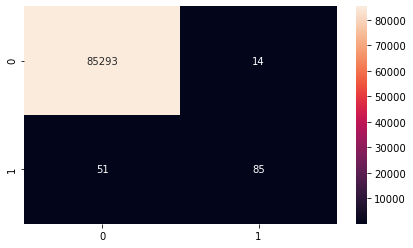

       Actual Predicted
43428     '1'       '1'
49906     '0'       '0'
29474     '0'       '0'
276481    '0'       '0'
278846    '0'       '0'


In [29]:
#13)heat map for confusion matrix
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(5))

In [30]:
#Build the model 2 (Random Forest)
random_forest = RandomForestClassifier(n_estimators = 5)

In [31]:
# Train the classifier
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [32]:
#test the model
y_pred = random_forest.predict(X_test)

In [33]:
#confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")
print(cm)
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1] [0])
print("Accuracy:",accuracy)
precision=(cm[0][0])/(cm[0][0]+cm[0][1])
print("Precision:",precision)
Recall=(cm[0][0])/(cm[0][0]+cm[1][0])
print("Recall:",Recall)

Confusion Matrix:

 [[85294    13]
 [   27   109]] 

[[85294    13]
 [   27   109]]
Accuracy: 0.9995318516437859
Precision: 0.9998476092231587
Recall: 0.9996835480127987


In [34]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     85307
         '1'       0.89      0.80      0.84       136

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [35]:
#Accuracy score 
a= (metrics.accuracy_score(y_test, y_pred))
print("Accuracy score:",round(a,1)) 

Accuracy score: 1.0


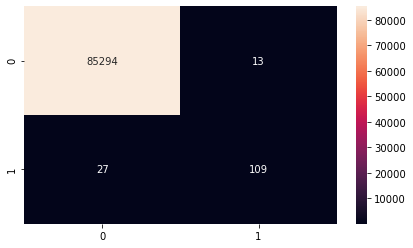

In [36]:
#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [37]:
#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred}) 
print(df1.head(5))

       Actual Predicted
43428     '1'       '1'
49906     '0'       '0'
29474     '0'       '0'
276481    '0'       '0'
278846    '0'       '0'


In [ ]:
"""""""""""""""""""""""""""""""""""""""""THE END""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [ ]:
#"""""""""""""""""""""""""""""""""""""""""""miniproject"""""""""""""""""""""""""""""""""""'""""""'"""
from tkinter import *
root=Tk()
from PIL import Image, ImageTk

root.title("MINI PROJECT")
root.geometry("1300x800")
root.configure(bg="#710193")
l10 = Label(text="MINI PROJECT", height=2, width=20, relief="solid", fg="yellow", bg="orange", font=("arial", 20, "bold"))
l10.place(x=480, y=20)


#"""""""""""""""""""""""""""""""""""""""""""A.images"""""""""""""""""""""""""""""""""""""""""""""""""""
#1
image= Image.open("C:\\Users\\JAYAVARDHAN SWARNA\\OneDrive\\Pictures\\py photos\\ocr.jpeg")
resize_image = image.resize((250, 250))
image = ImageTk.PhotoImage(resize_image)
lab = Label(image=image)
lab.place(x=20, y=100)

#2
image1= Image.open("C:\\Users\\JAYAVARDHAN SWARNA\\OneDrive\\Pictures\\py photos\\digiclock.jpg")
resize_image1 = image1.resize((250, 250))
image1 = ImageTk.PhotoImage(resize_image1)
lab = Label(image=image1)
lab.place(x=310, y=105)

#3
image2= Image.open("C:\\Users\\JAYAVARDHAN SWARNA\\OneDrive\\Pictures\\py photos\\cal.jpg")
resize_image2 = image2.resize((250, 250))
image2 = ImageTk.PhotoImage(resize_image2)
lab = Label(image=image2)
lab.place(x=600, y=100)

#4
image3= Image.open("C:\\Users\\JAYAVARDHAN SWARNA\\OneDrive\\Pictures\\py photos\\face.jpg")
resize_image3 = image3.resize((250,250))
image3 = ImageTk.PhotoImage(resize_image3)
lab = Label(image=image3)
lab.place(x=890, y=100)

#5
image4= Image.open("C:\\Users\\JAYAVARDHAN SWARNA\\OneDrive\\Pictures\\py photos\\music.png")
resize_image4 = image4.resize((250, 250))
image4 = ImageTk.PhotoImage(resize_image4)
lab = Label(image=image4)
lab.place(x=20, y=450)

#6
image5= Image.open("C:\\Users\\JAYAVARDHAN SWARNA\\OneDrive\\Pictures\\py photos\\tic.jpg")
resize_image5 = image5.resize((250, 250))
image5 = ImageTk.PhotoImage(resize_image5)
lab = Label(image=image5)
lab.place(x=310, y=450)

#7
image6= Image.open("C:\\Users\\JAYAVARDHAN SWARNA\\OneDrive\\Pictures\\py photos\\audio.png")
resize_image6 = image6.resize((250, 250))
image6 = ImageTk.PhotoImage(resize_image6)
lab = Label(image=image6)
lab.place(x=600, y=450)
#"""""""""""""""""""""""""""""""""""""""""""Z.images""""""""""""""""""""""""""""""""""""""""""""""""""



#def Exitt():
#    exit()


def imgtotext():
#""""""""""""""""""""""""""""""""""""""""""""""A.ocr""""""""""""""""""""""""""""""""""""""""""""""""""
    import pytesseract
    import PIL.Image
    import tkinter
    from tkinter import filedialog
    
    window = Tk()
    window.title("OCR")
    window.geometry("400x400")

    def opennFile():
        path = filedialog.askopenfilename()
        pytesseract.pytesseract.tesseract_cmd = r'D:\Python\python installation 3.7.9\tesseract in jupyter\tesseract.exe'
        img = PIL.Image.open(path)
        textt = pytesseract.image_to_string(img)
        #print(textt)
        l1 = Label(window, text=textt, width=30).place(x=80, y=100)
    
    
    b1 = Button(window, text="Open", width = 10, fg="orange", bg="yellow", font=("arial", 20, "bold"), command=opennFile)
    b1.place(x=110, y=10)

    window.mainloop()
#""""""""""""""""""""""""""""""""""""""""""""""z.ocr""""""""""""""""""""""""""""""""""""""""""""""""""
def alarmclock():
#"""""""""""""""""""""""""""""""""""""""""A.alarm clock"""""""""""""""""""""""""""""""""""""""""""""""""
    from tkinter import Label, Tk 
    import time
    app_window = Tk() 
    app_window.title("Digital Clock") 
    app_window.geometry("520x150") 
    app_window.resizable(1,1)

    text_font= ("Boulder", 68, 'bold')
    background = "#f2e750"
    foreground= "#363529"
    border_width = 25

    label = Label(app_window, font=text_font, bg=background, fg=foreground, bd=border_width) 
    label.grid(row=0, column=1)

    def digital_clock(): 
        time_live = time.strftime("%H:%M:%S")
        label.config(text=time_live) 
        label.after(200, digital_clock)

    digital_clock()
    app_window.mainloop()
#""""""""""""""""""""""""""""""""""""""""""""""""z.alarm clock"""""""""""""""""""""""""""""""""""""""""''


#"""""""""""""""""""""""""""""""""""""""""""""""A.CALENDAR"""""""""""""""""""""""""""""""""""""""""""""""
def calender():    
    #from tkinter import *
    import calendar

    #function to show calendar of the given year
    def showCalender():
        gui = Tk()
        gui.config(background='grey')
        gui.title("Calender for the year")
        gui.geometry("550x600")
        year = int(year_field.get())
        gui_content= calendar.calendar(year)
        calYear = Label(gui, text= gui_content, font= "Consolas 10 bold")
        calYear.grid(row=5, column=1,padx=20)
        gui.mainloop()
    
    #Driver code
    if __name__=='__main__':
        new = Tk()
        new.config(background='grey')
        new.title("Calender")
        new.geometry("250x140")
        cal = Label(new, text="Calender",bg='grey',font=("times", 28, "bold"))
        year = Label(new, text="Enter year", bg='dark grey')
        year_field=Entry(new)
        button = Button(new, text='Show Calender',
    fg='Black',bg='Blue',command=showCalender)

        #putting widgets in position
        cal.grid(row=1, column=1)
        year.grid(row=2, column=1)
        year_field.grid(row=3, column=1)
        button.grid(row=4, column=1)
        #Exit.grid(row=6, column=1)
        new.mainloop()
#""""""""""""""""""""""""""""""""""""""""""""z.CALENDAR""""""""""""""""""""""""""""""""""""""""""""'""'

#""""""""""""""""""""""""""""""""""""""""""""A.Face sketches""""""""""""""""""""""""""""""""""""""""""""""
def facesketches():
    import cv2
    from tkinter import filedialog
    path = filedialog.askopenfilename()
    image = cv2.imread(path)
    cv2.imshow("nani", image)
    cv2.waitKey(0)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imshow("New nani", gray_image)
    cv2.waitKey(0)

    inverted_image = 255 - gray_image
    cv2.imshow("Inverted nani", inverted_image)
    cv2.waitKey()

    blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)
    inverted_blurred = 255 - blurred
    pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale=256.0)
    cv2.imshow("Sketch nani", pencil_sketch)
    cv2.waitKey(0)

    cv2.imshow("original image nani", image)
    cv2.imshow("pencil sketch nani", pencil_sketch)
    cv2.waitKey(0)

#""""""""""""""""""""""""""""""""""""""""""""Z.Face sketches""""""""""""""""""""""""""""""""""""""""""
def musicplayer():
#"""""""""""""""""""""""""""""""""""""""""""""A.music player""""""""""""""""""""""""""""""""""""""""""
    import pygame
    import tkinter as tkr
    from tkinter.filedialog import askdirectory
    import os

    music_player = tkr.Tk()
    music_player.title("My Music Player")
    music_player.geometry("450x350")
    directory = askdirectory()
    os.chdir(directory)
    song_list = os.listdir()

    play_list = tkr.Listbox(music_player, font="Helvetica 12 bold", bg='yellow', selectmode=tkr.SINGLE)
    for item in song_list:
        pos = 0
        play_list.insert(pos, item)
        pos += 1
    pygame.init()
    pygame.mixer.init()

    def play():
        pygame.mixer.music.load(play_list.get(tkr.ACTIVE))
        var.set(play_list.get(tkr.ACTIVE))
        pygame.mixer.music.play()
    def stop():
        pygame.mixer.music.stop()
    def pause():
        pygame.mixer.music.pause()
    def unpause():
        pygame.mixer.music.unpause()
    Button1 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="PLAY", command=play, bg="blue", fg="white")
    Button2 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="STOP", command=stop, bg="red", fg="white")
    Button3 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="PAUSE", command=pause, bg="purple", fg="white")
    Button4 = tkr.Button(music_player, width=5, height=3, font="Helvetica 12 bold", text="UNPAUSE", command=unpause, bg="orange", fg="white")

    var = tkr.StringVar() 
    song_title = tkr.Label(music_player, font="Helvetica 12 bold", textvariable=var)

    song_title.pack()
    Button1.pack(fill="x")
    Button2.pack(fill="x")
    Button3.pack(fill="x")
    Button4.pack(fill="x")
    play_list.pack(fill="both", expand="yes")
    music_player.mainloop()
#"""""""""""""""""""""""""""""""""""""""""""""Z.music player""""""""""""""""""""""""""""""""""""""""""
#"""""""""""""""""""""""""""""""""""""""""'A.tic tac toe"""""""""""""""""""""""""""""""""""""""""""""""""""
def tictactoe():
    #from tkinter import *
    import tkinter
    import numpy as np

    size_of_board = 600
    symbol_size = (size_of_board / 3 - size_of_board / 8) / 2
    symbol_thickness = 50
    symbol_X_color = '#EE4035'
    symbol_O_color = '#0492CF'
    Green_color = '#7BC043'


    class Tic_Tac_Toe():
        # ------------------------------------------------------------------
        # Initialization Functions:
        # ------------------------------------------------------------------
        def __init__(self):
            self.window = Tk()
            self.window.title('Tic-Tac-Toe')
            self.canvas = Canvas(self.window, width=size_of_board, height=size_of_board)
            self.canvas.pack()
            # Input from user in form of clicks
            self.window.bind('<Button-1>', self.click)

            self.initialize_board()
            self.player_X_turns = True
            self.board_status = np.zeros(shape=(3, 3))

            self.player_X_starts = True
            self.reset_board = False
            self.gameover = False
            self.tie = False
            self.X_wins = False
            self.O_wins = False

            self.X_score = 0
            self.O_score = 0
            self.tie_score = 0

        def mainloop(self):
            self.window.mainloop()

        def initialize_board(self):
            for i in range(2):
                self.canvas.create_line((i + 1) * size_of_board / 3, 0, (i + 1) * size_of_board / 3, size_of_board)

            for i in range(2):
                self.canvas.create_line(0, (i + 1) * size_of_board / 3, size_of_board, (i + 1) * size_of_board / 3)

        def play_again(self):
            self.initialize_board()
            self.player_X_starts = not self.player_X_starts
            self.player_X_turns = self.player_X_starts
            self.board_status = np.zeros(shape=(3, 3))

        # ------------------------------------------------------------------
        # Drawing Functions:
        # The modules required to draw required game based object on canvas
        # ------------------------------------------------------------------

        def draw_O(self, logical_position):
            logical_position = np.array(logical_position)
            # logical_position = grid value on the board
            # grid_position = actual pixel values of the center of the grid
            grid_position = self.convert_logical_to_grid_position(logical_position)
            self.canvas.create_oval(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                outline=symbol_O_color)

        def draw_X(self, logical_position):
            grid_position = self.convert_logical_to_grid_position(logical_position)
            self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)
            self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] + symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] - symbol_size, width=symbol_thickness,
                                fill=symbol_X_color)

        def display_gameover(self):

            if self.X_wins:
                self.X_score += 1
                text = 'Winner: Player 1 (X)'
                color = symbol_X_color
            elif self.O_wins:
                self.O_score += 1
                text = 'Winner: Player 2 (O)'
                color = symbol_O_color
            else:
                self.tie_score += 1
                text = 'Its a tie'
                color = 'gray'

            self.canvas.delete("all")
            self.canvas.create_text(size_of_board / 2, size_of_board / 3, font="cmr 60 bold", fill=color, text=text)

            score_text = 'Scores \n'
            self.canvas.create_text(size_of_board / 2, 5 * size_of_board / 8, font="cmr 40 bold", fill=Green_color,
                                text=score_text)

            score_text = 'Player 1 (X) : ' + str(self.X_score) + '\n'
            score_text += 'Player 2 (O): ' + str(self.O_score) + '\n'
            score_text += 'Tie                    : ' + str(self.tie_score)
            self.canvas.create_text(size_of_board / 2, 3 * size_of_board / 4, font="cmr 30 bold", fill=Green_color,
                                text=score_text)
            self.reset_board = True

            score_text = 'Click to play again \n'
            self.canvas.create_text(size_of_board / 2, 15 * size_of_board / 16, font="cmr 20 bold", fill="gray",
                                text=score_text)

        # ------------------------------------------------------------------
        # Logical Functions:
        # The modules required to carry out game logic
        # ------------------------------------------------------------------

        def convert_logical_to_grid_position(self, logical_position):
            logical_position = np.array(logical_position, dtype=int)
            return (size_of_board / 3) * logical_position + size_of_board / 6

        def convert_grid_to_logical_position(self, grid_position):
            grid_position = np.array(grid_position)
            return np.array(grid_position // (size_of_board / 3), dtype=int)

        def is_grid_occupied(self, logical_position):
            if self.board_status[logical_position[0]][logical_position[1]] == 0:
                return False
            else:
                return True

        def is_winner(self, player):

            player = -1 if player == 'X' else 1

            # Three in a row
            for i in range(3):
                if self.board_status[i][0] == self.board_status[i][1] == self.board_status[i][2] == player:
                    return True
                if self.board_status[0][i] == self.board_status[1][i] == self.board_status[2][i] == player:
                    return True

            # Diagonals
            if self.board_status[0][0] == self.board_status[1][1] == self.board_status[2][2] == player:
                return True

            if self.board_status[0][2] == self.board_status[1][1] == self.board_status[2][0] == player:
                return True

            return False

        def is_tie(self):

            r, c = np.where(self.board_status == 0)
            tie = False
            if len(r) == 0:
                tie = True

            return tie

        def is_gameover(self):
            # Either someone wins or all grid occupied
            self.X_wins = self.is_winner('X')
            if not self.X_wins:
                self.O_wins = self.is_winner('O')

            if not self.O_wins:
                self.tie = self.is_tie()

            gameover = self.X_wins or self.O_wins or self.tie

            if self.X_wins:
                print('X wins')
            if self.O_wins:
                print('O wins')
            if self.tie:
                print('Its a tie')

            return gameover





        def click(self, event):
            grid_position = [event.x, event.y]
            logical_position = self.convert_grid_to_logical_position(grid_position)

            if not self.reset_board:
                if self.player_X_turns:
                    if not self.is_grid_occupied(logical_position):
                        self.draw_X(logical_position)
                        self.board_status[logical_position[0]][logical_position[1]] = -1
                        self.player_X_turns = not self.player_X_turns
                else:
                    if not self.is_grid_occupied(logical_position):
                        self.draw_O(logical_position)
                        self.board_status[logical_position[0]][logical_position[1]] = 1
                        self.player_X_turns = not self.player_X_turns

                # Check if game is concluded
                if self.is_gameover():
                    self.display_gameover()
                    # print('Done')
            else:  # Play Again
                self.canvas.delete("all")
                self.play_again()
                self.reset_board = False


    game_instance = Tic_Tac_Toe()
    game_instance.mainloop()
#"""""""""""""""""""""""""""""""""""""""""'Z.tic tac toe"""""""""""""""""""""""""""""""""""""""""""""""""""

#""""""""""""""""""""""""""""""""""""""A.text to audiobook""""""""""""""""""""""""""""""""""""''''''''''''""'
def audiobook():
    
    import PyPDF2
    from tkinter import filedialog
    import tkinter

    noon = Tk()
    noon.geometry("400x400")
    noon.title("AudioBook")
    #open('D:\\babby c languag\\Assignment-7(S.Nithin Sai)-converted.pdf', 'rb')

    def opener():
        pdfReader = PyPDF2.PdfFileReader(filedialog.askopenfilename())
        import pyttsx3
        speaker = pyttsx3.init()
        for page_num in range(pdfReader.numPages):
            text =  pdfReader.getPage(page_num).extractText()
            speaker.say(text)
            speaker.runAndWait()
        speaker.stop("stop")
        engine.save_to_file(text, 'audio.mp3')
        engine.runAndWait()

    
    #def player():
    

    #def pauser():
    

    #def canceller():
    
    
    
    b1=Button(nani, width = 15, text="Open", fg="orange", bg="yellow", font=("arial", 20, "bold"), command=opener)
    b1.place(x=10,y=10)
    #b2=Button(nani, width = 15, text="play", fg="orange", bg="yellow", font=("arial", 20, "bold"), command=opener)
    #b2.place(x=10,y=50)
    #b3=Button(nani, width = 15, text="pause", fg="orange", bg="yellow", font=("arial", 20, "bold"), command=pauser)
    #b3.place(x=10,y=100)
    #b3=Button(nani, width = 15, text="Cancel", fg="orange", bg="yellow", font=("arial", 20, "bold"), command=opener)
    #b3.place(x=10,y=150)

    noon.mainloop()
#""""""""""""""""""""""""""""""""""""""Z.text to audiobook""""""""""""""""""""""""""""""""""""''''''''''''""'


#b0=Button(root, text="Exit", height=5, width = 5, fg="yellow", bg="orange", font=("arial", 20, "bold"), command=Exitt)
#b0.place(x=10,y=5)
b1=Button(root, text="OCR", height=1, width = 15, fg="yellow", bg="orange", font=("arial", 20, "bold"), command=imgtotext)
b1.place(x=15,y=370)
b2=Button(root, width = 15, text="DigiClock", fg="yellow", bg="orange", font=("arial", 20, "bold"), command=alarmclock)
b2.place(x=310,y=370)
b3=Button(root, width = 15, text="Calendar", fg="yellow", bg="orange", font=("arial", 20, "bold"), command=calender)
b3.place(x=600,y=370)
b4=Button(root, width = 15, text="FaceSketch", fg="yellow", bg="orange", font=("arial", 20, "bold"), command=facesketches)
b4.place(x=890,y=370)
b5=Button(root, width = 15, text="MusicPlayer", fg="yellow", bg="orange", font=("arial", 20, "bold"), command=musicplayer)
b5.place(x=20,y=720)
b6=Button(root, width = 15, text="TicTacToeGame", fg="yellow", bg="orange", font=("arial", 20, "bold"), command=tictactoe)
b6.place(x=310,y=720)
b7=Button(root, width = 15, text="AudioBook", fg="yellow", bg="orange", font=("arial", 20, "bold"), command=audiobook)
b7.place(x=600,y=720)






root.mainloop()